In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256  # the number of neurons in hidden layer
# input size is 28*28 = 784

In [4]:
# We do not use the labels of images
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

In [5]:
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01))
# padding = 'SAME' keeps output size equal to input.
L1 = tf.nn.conv2d(X, W1, strides=[1,2,2,1], padding='SAME')
#print(L1.shape)
L1 = tf.nn.relu(L1)
W_encode = tf.Variable(tf.random_normal([14*14*32, 256], stddev=0.01))
L2 = tf.reshape(L1, [-1, 14*14*32])
h = tf.matmul(L2, W_encode)
#print(h.shape)

In [6]:
# typically the output size of encoder is smaller than input size of encoder
# the output size of decoder must be the same as the input image size
output_batch = tf.shape(X)[0]
deconv_shape = tf.stack([output_batch, 28, 28, 1])
W_decode = tf.Variable(tf.random_normal([256, 14*14*32]))
L3 = tf.matmul(h, W_decode)
W3 = tf.Variable(tf.random_normal([5,5,1,32]))
L3 = tf.reshape(L3, [-1,14,14,32])

decoder = tf.nn.conv2d_transpose(L3, W3, 
                                 output_shape=deconv_shape, strides=[1,2,2,1], padding='SAME')
decoder = tf.nn.sigmoid(decoder)

In [7]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs.reshape(-1,28,28,1)})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

Epoch: 0001 Avg. cost = 0.0273
Epoch: 0002 Avg. cost = 0.0084
Epoch: 0003 Avg. cost = 0.0056
Epoch: 0004 Avg. cost = 0.0042
Epoch: 0005 Avg. cost = 0.0035
Epoch: 0006 Avg. cost = 0.0028
Epoch: 0007 Avg. cost = 0.0024
Epoch: 0008 Avg. cost = 0.0021
Epoch: 0009 Avg. cost = 0.0020
Epoch: 0010 Avg. cost = 0.0019
Epoch: 0011 Avg. cost = 0.0018
Epoch: 0012 Avg. cost = 0.0017
Epoch: 0013 Avg. cost = 0.0017
Epoch: 0014 Avg. cost = 0.0017
Epoch: 0015 Avg. cost = 0.0016
Epoch: 0016 Avg. cost = 0.0016
Epoch: 0017 Avg. cost = 0.0016
Epoch: 0018 Avg. cost = 0.0016
Epoch: 0019 Avg. cost = 0.0015
Epoch: 0020 Avg. cost = 0.0015


Original Images


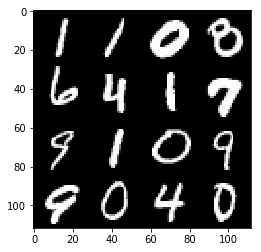

Reconstructed Images


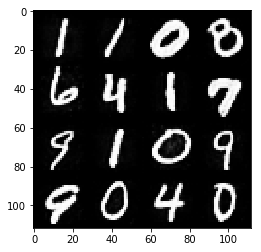

In [10]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder, feed_dict={X: batch_x.reshape(-1,28,28,1)})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()